## Clustering Algorithm Tutorial##
### Kmeans & Hierarichal Agglomerative ###
#### Created by William Tannous, Kx Systems #### 

In [1]:
//
// Library Imports
//

np:.p.import`numpy
pd:.p.import`pandas
enl:enlist
plt:.matplotlib.pyplot[];

In [2]:
// Data Set Import
data:("hshhh";enl",")0:`:Mall_Customers.csv

In [3]:
data

CustomerID Genre  Age Annual Income (k$) Spending Score (1-100)
---------------------------------------------------------------
1          Male   19  15                 39                    
2          Male   21  15                 81                    
3          Female 20  16                 6                     
4          Female 23  16                 77                    
5          Female 31  17                 40                    
6          Female 22  17                 76                    
7          Female 35  18                 6                     
8          Female 23  18                 94                    
9          Male   64  19                 3                     
10         Female 30  19                 72                    
11         Male   67  19                 14                    
12         Female 35  19                 99                    
13         Female 58  20                 15                    
14         Female 24  20                

### Cluster Customers based on Annual Income and Spending Score ###
#### Using the elbow method to find the optimal number of clusters ####

In [4]:
coi:`$("Annual Income (k$)";"Spending Score (1-100)") / Columns of interest
x:coi#data
x

Annual Income (k$) Spending Score (1-100)
-----------------------------------------
15                 39                    
15                 81                    
16                 6                     
16                 77                    
17                 40                    
17                 76                    
18                 6                     
18                 94                    
19                 3                     
19                 72                    
19                 14                    
19                 99                    
20                 15                    
20                 77                    
20                 13                    
20                 79                    
21                 35                    
21                 66                    
23                 29                    
23                 98                    
..


In [5]:
kmc:.p.import[`sklearn.cluster;`:KMeans] / K-means Class

//
// @desc Graphs within-cluster sum of squares for a dataset up a to specified 
// maximum number of clusters (K).
//
// @param max_k {int} Maximum number of clusters.
// @param defs {dictionary} Default hyperparamaters for model.
// @param data {table} Dataset.
//
graphElbowMethod:{[max_k;defs;data]
    k_list:1+til max_k;
    data_f:.p.q2py flip data cols data; / Foreign object of data
    
    wcss:{[k;defs;data]obj:kmc[]; / K means cluster object
        obj[:;;]'[key defs;value defs]; / Set default hyperparameters
        obj[:;`n_clusters;k]; / Set number of clusters for fit
        obj[`:fit;data]; / Fit model
        obj[`:inertia_]` / Return WCSS
        }[;defs;data_f]each k_list;

    plt.plot[k_list;wcss];
    plt.xlabel"Number of clusters";
    plt.ylabel"WCSS";
    plt.title"Elbow Method";
    plt.figure(pykwargs enlist[`figsize]!enlist(25,20));
    plt.show[];
    }

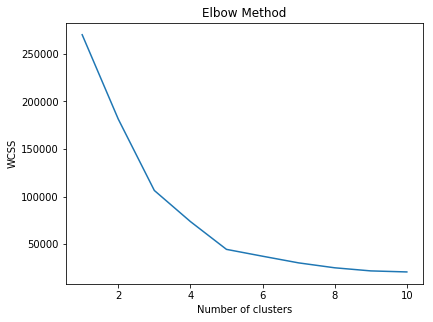

In [6]:
defaultAttr:`init`max_iter`n_init`random_state!("k-means++";300;10;0); / Set Default attributes
graphElbowMethod[10;defaultAttr;x]

### From the graph above, we can determine that the optimal number of clusters is 5 ###

### Let's apply the k-means algorithm with the optimal number of clusters and visualize our results ###

In [7]:
kmc:.p.import[`sklearn.cluster;`:KMeans] / K-means Class
hparams:`n_clusters`init`max_iter`n_init`random_state!(5;"k-means++";300;10;0); / Chosen Hyperparameters

//
// @desc Applies K-means Clustering algorithm on a 2 Dimensional dataset
// and visualizes the results on a scatter plot.
//
// @param data {table} Two-Dimensional dataset.
// @param hp {dictionary} Hyperparameters
//
KMeansClustering:{[data;hp]
    k:hp`n_clusters; / Number of Clusters
    cn:til k; / Cluster Numbers
    data_f:.p.q2py flip vd:data cols data; / Foreign object of data
    ko:kmc[pykwargs hp]; / K means cluster object
    pred:ko[`:fit_predict][data_f]`; / Predicted Cluster Number
    i:where each pred=/:cn; / Index list for each cluster
    
    //
    // Graphing the dataset in a scatter plot
    //
    labels:"Cluster ",/:string 1+cn;
    x_data:vd[0;i];
    y_data:vd[1;i];
    plt.figure pykwargs enlist[`figsize]!enlist(10;10);
    plt.scatter'[x_data;y_data;50;`label pykw labels]; / Plot Clusters
    
    //
    // Centroids
    //
    cent_pos:ko[`:cluster_centers_]`; / Centroid coordinates
    plt.scatter[cent_pos[;0];cent_pos[;1];300]; / Plot Centroids

    //
    // General Graph Formatting
    //
    plt.title"K means clutering";
    plt.xlabel string first cols data;
    plt.ylabel string last cols data;
    plt.legend labels,enl"Centroids";
    plt.show[];
    }

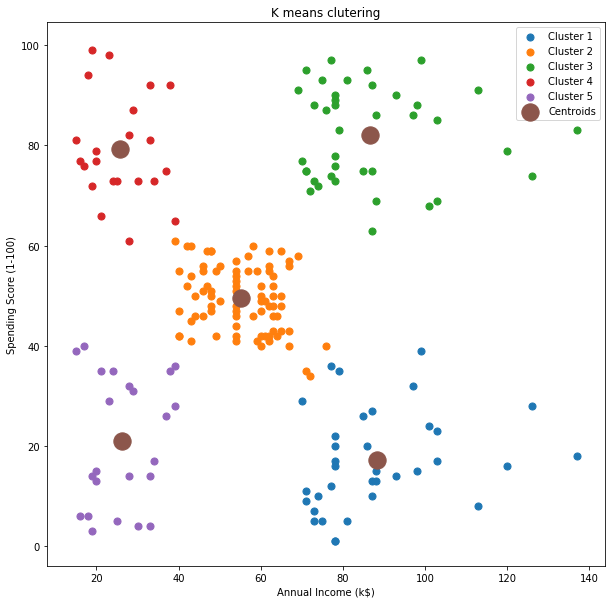

In [8]:
KMeansClustering[x;hparams]

### Let's try another method (Hierarichal Clustering)###

#### To find the optimal number of clusters, we will graph a dendogram to inspect euclidean distances between different clutsering combinations####

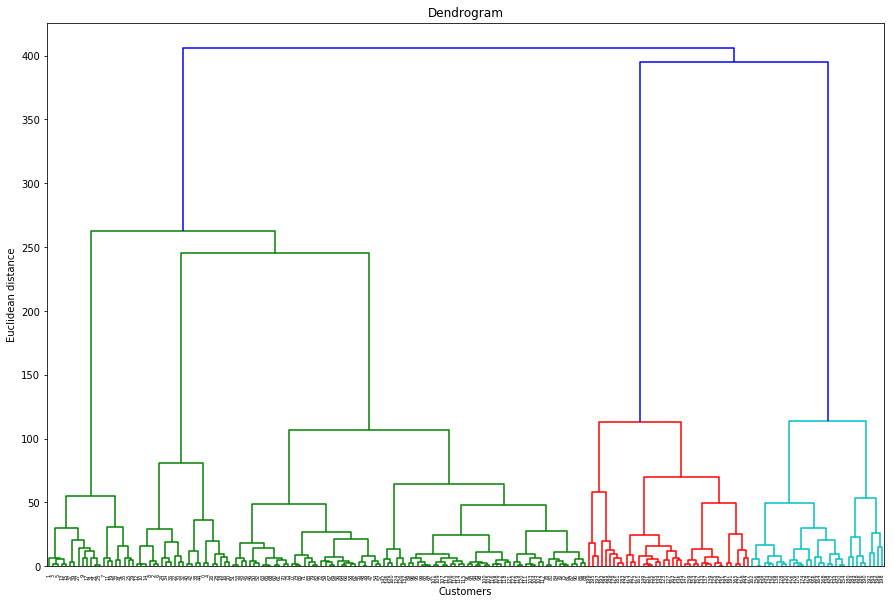

In [9]:
sch:.p.import[`scipy.cluster.hierarchy]; / Import Scipy Hierarchy Library
plt.figure pykwargs enlist[`figsize]!enlist(15;10); / Adjust figure size
data:flip x cols x;
dobj:sch[`:dendrogram][sch[`:linkage][data;`method pykw "ward"]];

plt.title"Dendrogram";
plt.xlabel"Customers";
plt.ylabel"Euclidean distance";
plt.show[];

### From the dendrogram above, we can determine that the optimal number of clusters is, again, 5###

### Let's apply the Agglomerative Clustering algorithm with the optimal number of clusters and visualize our results ###

In [10]:
agc:.p.import[`sklearn.cluster;`:AgglomerativeClustering] / Import AgglomerativeClustering Class
hparams:`n_clusters`affinity`linkage!(5;"euclidean";"ward"); / Chosen Hyperparameters

//
// @desc Applies Agglomerative Clustering algorithm on a 2-Dimensional dataset
// and visualizes the results on a scatter plot.
//
// @param data {table} Two-Dimensional dataset.
// @param hp {dictionary} Hyperparameters
//
aggClustering:{[data;hp]
    k:hp`n_clusters; / Number of Clusters
    cn:til k; / Cluster Numbers
    data_f:.p.q2py flip vd:data cols data; / Foreign object of data
    ao:agc[pykwargs hp]; / Agg cluster object
    pred:ao[`:fit_predict][data_f]`; / Predicted Cluster Number
    i:where each pred=/:cn; / Index list for each cluster
    
    //
    // Graphing the dataset in a scatter plot
    //
    labels:"Cluster ",/:string 1+cn;
    x_data:vd[0;i];
    y_data:vd[1;i];
    plt.figure pykwargs enlist[`figsize]!enlist(10;10);
    plt.scatter'[x_data;y_data;75;`label pykw labels]; / Plot Clusters
    
    //
    // General Graph Formatting
    //
    plt.title"Agglomerative Clustering";
    plt.xlabel string first cols data;
    plt.ylabel string last cols data;
    plt.legend labels;
    plt.show[];
    }

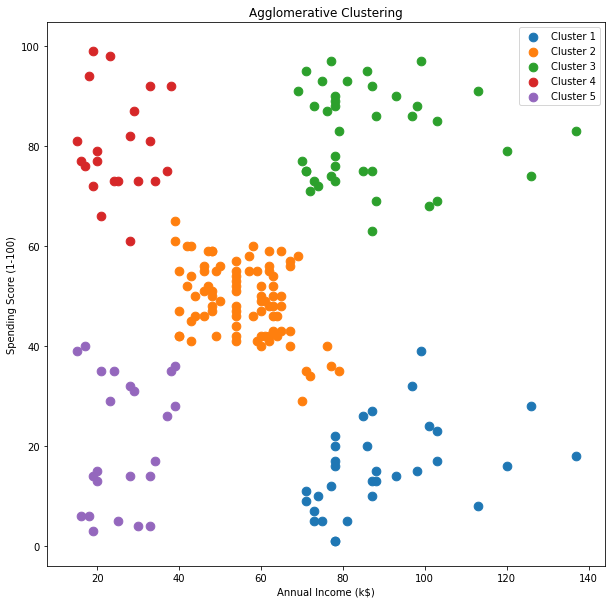

In [11]:
aggClustering[x;hparams]

### Generalized Clustering Function ####

In [12]:
//
// @desc Applies a specified clustering algorithm on a 2-Dimensional dataset
// and visualizes the results on a scatter plot.
//
// @param algo {symbol} Clustering Algorithm. (`KMeans|AgglomerativeClustering)
// @param data {table} Two-Dimensional dataset.
// @param hp {dictionary} Hyperparameters
//
graphClusters:{[algo;data;hp]
    clusClass:.p.import[`sklearn.cluster;hsym algo]; / Import clustering Class
    k:hp`n_clusters; / Number of Clusters
    cn:til k; / Cluster Numbers
    data_f:.p.q2py flip vd:data cols data; / Foreign object of data
    obj:clusClass[pykwargs hp]; / Cluster object
    pred:obj[`:fit_predict][data_f]`; / Predicted Cluster Number
    i:where each pred=/:cn; / Index list for each cluster
    
    //
    // Graphing the dataset in a scatter plot
    //
    labels:"Cluster ",/:string 1+cn;
    x:vd[0;i];
    y:vd[1;i];
    plt.figure pykwargs enlist[`figsize]!enlist(10;10);
    plt.scatter'[x;y;75;`label pykw labels]; / Plot Clusters
    
    //
    // Centroids plot - if Kmeans
    //
    if[isKM:algo=`KMeans;
        cent_pos:obj[`:cluster_centers_]`; / Centroid coordinates
        plt.scatter[cent_pos[;0];cent_pos[;1];300];] / Plot Centroids
    //
    // General Graph Formatting
    //
    plt.title string[algo]," Clustering";
    plt.xlabel string first cols data;
    plt.ylabel string last cols data;
    plt.legend labels,$[isKM;enl"Centroids";()];
    plt.show[];
    }

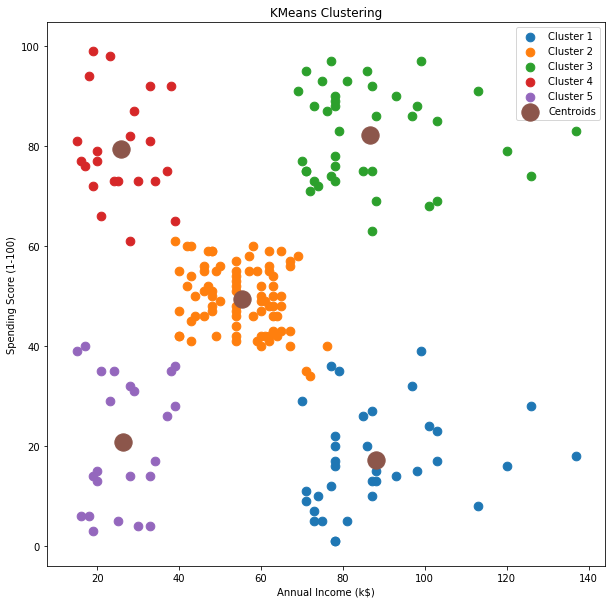

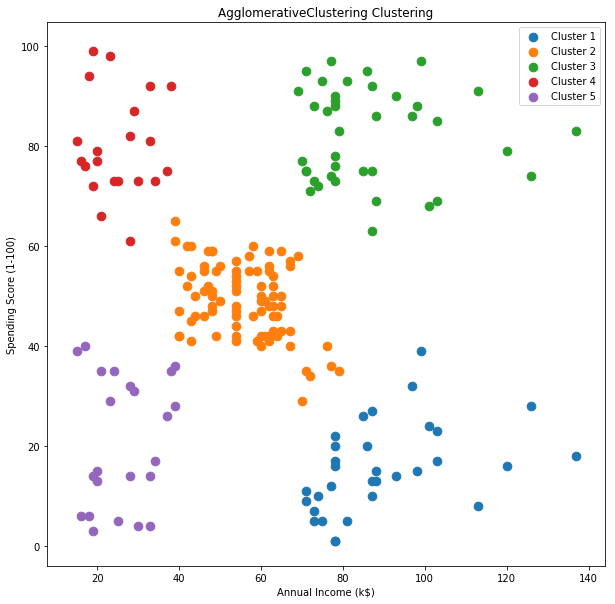

In [13]:
hparamsK:`n_clusters`init`max_iter`n_init`random_state!(5;"k-means++";300;10;0);
hparamsAgg:`n_clusters`affinity`linkage!(5;"euclidean";"ward");
graphClusters[`KMeans;x;hparamsK]
graphClusters[`AgglomerativeClustering;x;hparamsAgg]